1. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát éves bontásban norbert2 azonosítójú ügyfél rendeléseinek értékéről!</span>

1. A lista megfelelően jelölve tartalmazza a végösszeget is!

In [7]:
SELECT CASE GROUPING_ID(YEAR(REND_DATUM))
            WHEN 1 THEN 'Összesen'
            ELSE CAST(YEAR(REND_DATUM) AS nvarchar(4))
            END, 
            SUM(EGYSEGAR*MENNYISEG) AS 'Érték'

FROM Rendeles INNER JOIN Rendeles_tetel ON Rendeles.SORSZAM = Rendeles_tetel.SORSZAM
WHERE [LOGIN] LIKE 'norbert2'
GROUP BY ROLLUP(YEAR(REND_DATUM)) 

(3 rows affected)

Total execution time: 00:00:00.025

(No column name) Érték 2015 483473 2017 614340 Összesen 1097813

2. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát szállítási dátumonként, azon belül szállítási módonként az egyes rendelések összmennyiségéről!</span>

1. Csak azokat a termékeket vegyük figyelembe, amelyek mennyiségi egysége db!
2. A listát szűrjük úgy, hogy az csak a részösszeg sorokat és a végösszeget tartalmazza!

In [6]:
SELECT REND_DATUM, SZALL_MOD, SUM(MENNYISEG)
FROM Rendeles INNER JOIN Rendeles_tetel ON Rendeles.SORSZAM = Rendeles_tetel.SORSZAM
INNER JOIN Termek ON Termek.TERMEKKOD = Rendeles_tetel.TERMEKKOD
WHERE MEGYS LIKE 'db'
GROUP BY ROLLUP(REND_DATUM, SZALL_MOD), SUM(MENNYISEG)

: Msg 144, Level 15, State 1, Line 5
Cannot use an aggregate or a subquery in an expression used for the group by list of a GROUP BY clause.

Total execution time: 00:00:00.001

```
3. Hány olyan ügyfél van, aki még nem rendelt semmit?
```

1. Csoportosítsuk őket nem szerint, azon belül életkor szerint!
2. A lista tartalmazza a részösszegeket és a végösszeget is!

![](https://moodle.uni-corvinus.hu/theme/image.php/adaptable/atto_h5p/1709548862/icon)

In [3]:
SELECT *
FROM Termek

(551 rows affected)

Total execution time: 00:00:00.072

TERMEKKOD MEGNEVEZES KAT_ID LISTAAR LEIRAS RAKTAR_KOD KESZLET MEGYS FELVITTE FELVITEL 01010001T félfamentes rajzlap A4 (10 lap) 127 342 NULL 9 3000 csomag Béla 2016-07-12 01010110T Fotópapír A/4 fényes 44 30 NULL 9 200 db Béla 2016-07-12 01010304T Öntapadós hologramos papír A/4 112 59 NULL 8 1100 db Sára 2016-07-11 01020299T Oklevél A/4 egyszínű 110 48 NULL 9 6600 db Béla 2016-07-07 01020300T Oklevél A/4 színes 110 55 NULL 9 200 db Béla 2016-07-12 01030091T Emléklap A/5 33 26 NULL 7 200 db Béla 2016-07-12 01030092T Esküvői meghívó 98 59 NULL 9 100 db Sára 2016-07-13 01040307T Pausz papír A/4 115 15 NULL 8 200 ív Sára 2016-07-13 01040502T Előlap spirálhoz 31 25 NULL 5 100 db Sára 2016-07-13 01080093T Fax papír 15 m 34 161 NULL 9 300 db Sára 2016-07-13 01080512T Öntapadó A/4 112 4575 NULL 5 100 doboz Sára 2016-07-13 01080513T Selyemfényű karton A/4 83 38 NULL 8 100 ív Sára 2016-07-11 01090498T Műnyomó 300g 17,5*20 101 3 NULL 8 1800 ív Mari 2016-07-06 01090499T Color Copy A/4 250 g 21 15 NULL 6 1500 Ív Sára 2016-07-09 01090500T Color Copy A4 200 g 21 14 NULL 9 100 Ív Béla 2016-07-04 01090501T Kreatív A/4 300g 90 4 NULL 8 100 Ív Béla 2016-07-01 01090515T Színes A/3 160 gr IQ 83 11 NULL 5 400 ív Béla 2016-07-01 01090516T Színes karton A4 83 25 NULL 9 1000 ív Béla 2016-07-01 01090517T Színes ofszet B/4 109 4 NULL 7 1000 ív Béla 2016-07-01 01100070T Dekorációs karton 83 73 NULL 5 600 ív Béla 2016-07-05 01100071T Dekorációs karton arany, ezüst 83 89 NULL 7 3100 ív Sára 2016-07-06 01100072T Dipa A/4 keretezett 26 9 NULL 9 400 ív Sára 2016-07-06 01100094T Fénymásoló papír DataCopy 36 845 NULL 9 300 csomag Sára 2016-07-02 01100095T Fénymásoló papír GetCopy 36 728 NULL 9 200 csomag Sára 2016-07-01 01100096T Fénymásoló papír Qconnect 36 728 NULL 5 500 csomag Sára 2016-07-01 01100496T Színes másoló a/4 80g 21 1500 NULL 5 300 csomag Sára 2016-07-01 01100497T Color Copy 160 g-os 21 14 NULL 5 100 ív Béla 2016-07-05 01100503T Color Copy A4 120 g 21 10 NULL 6 900 ív Béla 2016-07-05 01100504T Fehér másoló A/3 36 1488 NULL 6 1000 csomag Sára 2016-07-10 01100505T Fehér másoló A/4 36 686 NULL 6 200 csomag Sára 2016-07-10 01100509T Márványos A/4 83 40 NULL 6 100 ív Sára 2016-07-12 01100510T Kreatív A/4 120g 90 13 NULL 5 200 ív Sára 2016-07-12 02010028T Árazószalag 10 106 NULL 9 100 db Sára 2016-07-16 02020029T Átírótömb A/6 11 115 NULL 8 200 db Sára 2016-07-19 02020032T Beírókönyv A5 13 133 NULL 8 200 db Sára 2016-07-16 02020033T Beírókönyv A4 13 328 NULL 5 100 db Sára 2016-07-11 02020037T Bevételi pénztárbizonylat 3×25 116 144 NULL 6 300 db Sára 2016-07-11 02020245T Kiadási pénztárbizonylat 2×25 116 103 NULL 7 400 db Sára 2016-07-11 02020444T Határidő napló A/6 62 464 NULL 9 2700 db Sára 2016-07-11 02030040T Boríték LA 4 francia 16 6 NULL 6 100 db Sára 2016-07-11 02030041T Boríték LC 5 16 6 NULL 9 2000 db Mari 2016-07-12 02030042T Boríték LC 6 16 3 NULL 6 2000 db Mari 2016-07-15 02030043T Boríték légp. kicsi 16 39 NULL 7 2500 db Sára 2016-07-20 02030044T Boríték mintás 16 15 NULL 6 10000 db Béla 2016-07-23 02040002T irodai tűzőgép 149 2100 NULL 6 10000 db Béla 2016-07-23 02040025T Álló irattartó karton 70 133 NULL 8 200 db Béla 2016-07-23 02040145T Gemkapocs 28 mm 48 30 NULL 8 400 db Béla 2016-07-23 02040146T Gemkapocs ICO 48 48 NULL 7 3200 db Béla 2016-07-23 02040147T Genotherm lefűzhető A/5 51 8 NULL 8 1500 db Béla 2016-07-23 02040148T Genotherm lefűzhető A4 10db-os 51 63 NULL 9 200 csomag Béla 2016-07-18 02040149T Genotherm A4 10db-os 51 110 NULL 7 4700 csomag Béla 2016-07-18 02040176T Gyorsfűző dosszié fehér 58 18 NULL 7 1200 db Sára 2016-07-23 02040177T Gyorsfűző műa. 58 30 NULL 5 200 db Béla 2016-07-21 02040178T Gyorsfűző műa. 58 35 NULL 8 1000 db Béla 2016-07-21 02040194T Hibajav.roll.Pritt 4,2mm 66 794 NULL 8 500 db Béla 2016-07-21 02040195T Hibajavító ecsetes Aqua 66 185 NULL 5 400 db Béla 2016-07-19 02040196T Hibajavító készlet Blanco 66 273 NULL 7 100 db Béla 2016-07-19 02040197T Hibajavító lap 66 81 NULL 9 100 db Béla 2016-07-19 02040198

4. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát a megrendelt termékek legkisebb és legnagyobb egységáráról szállítási dátum, azon belül szállítási mód szerinti bontásban!</span>

1. A lista csak a 2015 májusi szállításokat tartalmazza!
2. Jelenítsük meg a részösszegeket és a végösszeget is!

5. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk csoportot a termékek listaára alapján a következők szerint:&nbsp;<br></span> <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Az "olcsó" termékek legyenek azok, amelyek listaára 3000 alatt van.<br>&nbsp;A "drága" termékek legyenek az 5000 felettiek, a többi legyen "közepes".</span>

1. Listázzuk az egyes csoportokat, és a csoportokba tartozó termékek darabszámát!
2. A lista jelenítse meg a végösszeget is!

In [11]:
SELECT CASE
        WHEN LISTAAR < 3000 THEN 'olcsó'
        WHEN LISTAAR > 5000 THEN 'drága'
        ELSE 'közepes'
        END AS 'Kategória',
        COUNT(TERMEKKOD) AS 'Darab'
FROM Termek
GROUP BY ROLLUP(CASE
        WHEN LISTAAR < 3000 THEN 'olcsó'
        WHEN LISTAAR > 5000 THEN 'drága'
        ELSE 'közepes'
        END)

(4 rows affected)

Total execution time: 00:00:00.007

Kategória Darab drága 20 közepes 5 olcsó 526 NULL 551

6. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát az ügyfelek adatairól név szerinti sorrendben.</span>

1. Minden sorban jelenjen meg a sorrend szerint előző, illetve következő ügyfél neve is.
2. Ha nincs előző vagy következő ügyfél, akkor a 'Nincs' jelenjen meg!

In [20]:
SELECT *, 
        LAG(NEV, 2, 'Nincs') OVER(ORDER BY NEV),
        LEAD(NEV, 5, 'Nincs') OVER(ORDER BY NEV)
FROM Ugyfel
ORDER BY NEV

(200 rows affected)

Total execution time: 00:00:00.015

LOGIN EMAIL NEV SZULEV NEM CIM (No column name) (No column name) david david@gmail.com Ambrus Dávid 1974 F 1149 Budapest, Fő út 18. Nincs Bagi Beáta IBOLYAA ibolya.andor@mail.hu Andor Ibolya 1983 N 9023 Győr, Posta köz 2. Nincs Bagóczki Alexandra LASZLOA lászló.antal@mail.hu Antal László 1969 F 2484 Agárd, Bécsi utca 82. Ambrus Dávid Bajusz Bence tamas tamás.antal@mail.hu Antal Tamás 1984 F 4440 Tiszavasvári, Posta köz 2. Andor Ibolya Bakó Klaudia andras4 andras4@gmail.com Back András 1984 F 3783 Edelény, Fő út 169. Antal László Bakódy Balázs beata4 beáta.bagi@mail.hu Bagi Beáta 1994 N 8477 Tüskevár, Felszabadulás utca 32. Antal Tamás Balla Miklós alexandra alexandra.bagóczki@mail.hu Bagóczki Alexandra 1992 N 2381 Táborfalva, Petőfi utca 1/2. Back András Balogh Eszter BENCEB bence.bajusz@mail.hu Bajusz Bence 1973 F 8391 Sármellék, Fő utca 56. Bagi Beáta Barabás Pál klaudia2 klaudia.bakó@mail.hu Bakó Klaudia 1982 N 8254 Kővágóörs, Kossuth Lajos utca 6. Bagóczki Alexandra Baráth Mária balazs3 balazs3@gmail.com Bakódy Balázs 1986 F 2131 Göd, Arany János utca 1. Bajusz Bence Bárci Gusztáv MIKLOSB miklós.balla@mail.hu Balla Miklós 1979 F 4060 Balmazújváros, Szent István utca 2. Bakó Klaudia Barkóci Ádám eszter2 eszter.balogh@mail.hu Balogh Eszter 1998 N 6760 Kistelek, Kossuth utca 11. Bakódy Balázs Barna Debóra pal pál.barabás@mail.hu Barabás Pál 1968 F 1183 Budapest, Szolnoki út 8. Balla Miklós Barna Zoltán maria1 mária.baráth@mail.hu Baráth Mária 1995 N 1047 Budapest, Posta köz 2. Balogh Eszter Baróti Attila gusztav gusztav@gmail.com Bárci Gusztáv 1967 F 3643 Dédestapolcsány, Endrődi Sándor utca 47. Barabás Pál Barta Zsuzsanna adam3 adam3@gmail.com Barkóci Ádám 1970 F 3910 Tokaj, Dózsa György utca 37. Baráth Mária Berendi Péter debora debóra.barna@mail.hu Barna Debóra 1976 N 1155 Budapest, Fő út 169. Bárci Gusztáv Béres Norbert zoltan4 zoltan4@gmail.com Barna Zoltán 1986 F 8313 Balatongyörök, Jászai tér 21. Barkóci Ádám Berta Dávid attila4 attila.baróti@mail.hu Baróti Attila 1975 F 7149 Báta, Arany János utca 3. Barna Debóra Bieniek Ádám zsuzsanna zsuzsanna.barta@mail.hu Barta Zsuzsanna 1994 N 4172 Biharnagybajom, Dózsa György utca 37. Barna Zoltán Bíró Ákos PETERB péter.berendi@mail.hu Berendi Péter 1969 F 3980 Sátoraljaújhely, Vasút utca 4/10. Baróti Attila Biró Alexander norbert5 norbert5@gmail.com Béres Norbert 1975 F 8640 Fonyód, Bajcsy-Zsilinszky utca 4. Barta Zsuzsanna Bíró Péter david4 david4@gmail.com Berta Dávid 1990 F 3500 Miskolc, Balatoni út 12. Berendi Péter Bittmann Edit adam4 ádám.bieniek@mail.hu Bieniek Ádám 1976 F 8630 Balatonboglár, Juhászföldi út 1. Béres Norbert Bodor Szabolcs akos ákos.bíró@mail.hu Bíró Ákos 1982 F 9023 Győr, Kossuth Lajos utca 47/b. Berta Dávid Bori Krisztina alexis alexbiro@gmail.com Biró Alexander 2000 F 6914 Pitvaros, Deák F. u. 38. Bieniek Ádám Boros Vivien peter4 péter.bíró@mail.hu Bíró Péter 1985 F 5137 Jászkisér, Rákóczi utca 67. Bíró Ákos Bosnyák Ilona edit edit.bittmann@mail.hu Bittmann Edit 1984 N 6077 Orgovány, Fő utca 60. Biró Alexander Botka Mátyás szabolcs szabolcs.bodor@mail.hu Bodor Szabolcs 1990 F 6786 Ruzsa, Ady Endre út 27. Bíró Péter Bozsik Balázs krisztina1 krisztina.bori@mail.hu Bori Krisztina 1969 N 2115 Vácszentlászló, Fő utca 47. Bittmann Edit Bozsó Péter vivien3 vivien3@gmail.com Boros Vivien 1991 N 2117 Isaszeg, Fő út 122. Bodor Szabolcs Böröcz Anikó ilona3 ilona3@gmail.com Bosnyák Ilona 1990 N 2483 Gárdony, Posta köz 2. Bori Krisztina Bucskó Róza matyas2 matyas2@gmail.com Botka Mátyás 1972 F 2700 Cegléd, Kossuth Lajos utca 6. Boros Vivien Búza Imre balazs1 balázs.bozsik@mail.hu Bozsik Balázs 1992 F 2300 Ráckeve, Bécsi utca 82. Bosnyák Ilona Czérna Krisztián peter2 peter2@gmail.com Bozsó Péter 1976 F 4800 Vásárosnamény, Zombori út 2/A Botka Mátyás Csiger Bertalan aniko4 aniko4@gmail.com Böröcz Anikó 1978 N 2484 Agárd, Petőfi Sándor tér 1. Bozsik Balázs Csóti Attila roza2 roza2@gmail.com Bucskó Róza 1988 N 5661 Újkígyós, Arany János utca 3. Bozsó Péter Dániel Tibor

7. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk lekérdezést, amely megmutatja, hogy melyik termékkategóriába hány termék tartozik. A lista a kategória nevét és a darabszámot jelenítse meg.</span>

1. A lista ne tartalmazzon duplikált sorokat.
2. A feladatot partíciók segítségével oldjuk meg!

In [14]:
SELECT DISTINCT Termekkategoria.KAT_NEV, COUNT(Termek.TERMEKKOD) OVER(PARTITION BY Termekkategoria.KAT_NEV)
FROM Termekkategoria INNER JOIN Termek ON Termekkategoria.KAT_ID = Termek.KAT_ID
--GROUP BY Termekkategoria.KAT_NEV

(143 rows affected)

Total execution time: 00:00:00.055

KAT_NEV (No column name) ajándék tárgy 3 ajándék tasak 20 álarc 3 alkalmi 3 alufólia 2 árazószalag 1 átírótömb 1 beíró 1 beírókönyv 2 bélyegző 4 bélyegzőfesték 1 boríték 7 cd tok 1 celofán 2 ceruza 19 címke 3 color copy 5 csomagoló 2 csomagoló papír 7 dekor 4 dipa 1 díszdoboz 3 díszkötöző 5 dvd 1 ecset 7 előlap 1 emlékkönyv 3 emléklap 1 fax papír 1 fehérnemű 7 fénymásoló papír 5 férfi ing 1 férfi kabát 1 férfi nadrág 2 festékpatron 1 filctoll 13 floppy 1 fólia 3 fotópapír 1 füzet 11 füzetborító 7 füzettartó 4 gemkapocs 2 gémkapocs 2 genoterm 1 genotherm 3 golyóstoll 26 gumigyűrű 1 gyermek cipő 6 gyermek kabát 2 gyermek nadrág 4 gyermek póló 2 gyorsfűző 3 gyurma 4 gyűrűskönyv 5 hajgumi 1 határidő napló 2 hegyező 4 hegyző 2 hibajavító 7 hűtőmágnes 2 indigó 2 írásvetítő fólia 1 iratgyűjtő 3 iratrendező 2 iratsín 2 irattartó 2 irodaszer 1 írólap 2 ironbél 5 iskolaszer 24 játékautó 4 jelzőkréta 1 kapocskiszedő 1 karton 6 kártya 1 képeslap 16 képkirakó 1 kosztüm 2 könyv 15 körző 3 kreatív 2 kulcstartó 7 labda 2 levélpapír 7 lufi 2 lyukasztó 2 mappa 9 matrica 10 meghívó 4 miliméterpapír 1 munkafüzet 9 műnyomó 1 naptár 1 naptárhát 2 névjegytartó 1 notesz 5 női kabát 1 női nadrág 1 ofszet 1 oklevél 2 olló 3 öntapadó 2 papízsebkendő 1 pausz 1 pénztárbizonylat 2 pénztárgépszalag 2 pixiron 9 plüss 3 post-it 2 radír 7 radírtoll 2 ragasztó 10 ragasztószalag 4 rágógumi 1 rajzlap 2 rajzszeg 2 regiszteres füzet 2 sál 1 spirál 1 strandlabda 1 szalvéta 6 számológép 2 szemetes 1 színes 2 szögmérő 3 szövegkiemelő 5 táblafilc 1 tapétavágó 1 tempera 2 térképtű 1 tintapatron 3 toll 2 tollbetét 18 tolltartó 7 toner 1 töltőtoll 1 tűzőgép 6 tűzőkapocs 2 vízfesték 4 vonalzó 6 zászló 1 zseléstoll 4

8. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát a rendelési tételekről. Az egyes rendelési tételeket termékenként soroljuk be 4 osztályba a rendelés mennyisége alapján. Jelenítsük meg ezt az információt is egy új oszlopban, az oszlop neve legyen 'Mennyiségi kategória'.</span>

1. A lista csak a 100 Ft feletti egységárú rendelési tételeket vegye figyelembe!

9. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Listázzuk a termékek kódját, megnevezését, kategóriájának nevét, és listaárát.</span>

1. A listát egészítsük ki két új oszloppal, amelyek a kategória legolcsóbb, illetve legdrágább termékének árát tartalmazzák.
2. A két új oszlop létrehozásánál partíciókkal dolgozzunk!

10. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát a rendelésekről. A lista legyen rendezve ügyfelenként (LOGIN), azon belül a rendelés dátuma szerint. A listához készítsünk sorszámozást is. A sorszám a következő formában jelenjen meg: sorszám_év_login. Pl: 1_2015_adam1</span>

1. A számozás login-onként, azon belül rendelési évenként kezdődjön újra.
2. A sorszám oszlop neve legyen Azonosító

In [42]:
SELECT CAST(ROW_NUMBER() OVER(PARTITION BY [LOGIN], YEAR(REND_DATUM) ORDER BY SORSZAM) AS nvarchar(10)) + '_' + CAST(YEAR(REND_DATUM) AS nvarchar(4)) + '_' + [LOGIN],
       *
FROM Rendeles
ORDER BY [LOGIN], REND_DATUM

(28085 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:00.387

(No column name) SORSZAM LOGIN REND_DATUM SZALL_DATUM SZALL_CIM SZALL_MOD FIZ_MOD SZAMLA_CIM 1_2015_adam1 121 adam1 2015-05-04 2015-05-13 NULL GLS Bankkártya NULL 2_2015_adam1 207 adam1 2015-05-06 2015-05-08 Békés, Fő u. 2. Posta Készpénz NULL 3_2015_adam1 237 adam1 2015-05-06 2015-05-10 NULL GLS Bankkártya NULL 4_2015_adam1 281 adam1 2015-05-08 2015-05-14 NULL Személyes átvétel Átutalás NULL 5_2015_adam1 647 adam1 2015-05-17 2015-05-19 NULL GLS Átutalás NULL 6_2015_adam1 648 adam1 2015-05-17 2015-05-22 Békés, Fő u. 2. GLS Bankkártya 5630 Békés, Fő u. 2. 7_2015_adam1 756 adam1 2015-05-20 2015-05-24 Békés, Fő u. 2. Személyes átvétel Bankkártya 5630 Békés, Fő u. 2. 8_2015_adam1 1418 adam1 2015-06-06 2015-06-15 NULL Posta Átutalás NULL 9_2015_adam1 1438 adam1 2015-06-07 2015-06-13 NULL GLS Átutalás NULL 10_2015_adam1 1631 adam1 2015-06-12 2015-06-14 NULL Személyes átvétel Bankkártya NULL 11_2015_adam1 1760 adam1 2015-06-15 2015-06-20 NULL Posta Átutalás NULL 12_2015_adam1 1953 adam1 2015-06-20 2015-06-24 Békés, Fő u. 2. Személyes átvétel Bankkártya NULL 13_2015_adam1 1987 adam1 2015-06-21 2015-06-30 NULL GLS Átutalás NULL 14_2015_adam1 2072 adam1 2015-06-23 2015-06-30 NULL GLS Bankkártya NULL 15_2015_adam1 2093 adam1 2015-06-24 2015-07-02 Békés, Kiss u. 32. Személyes átvétel Bankkártya NULL 16_2015_adam1 2119 adam1 2015-06-24 2015-07-04 Békés, Kiss u. 32. GLS Átutalás NULL 17_2015_adam1 2234 adam1 2015-06-27 2015-07-03 NULL GLS Készpénz NULL 18_2015_adam1 2256 adam1 2015-06-28 2015-07-04 NULL Személyes átvétel Átutalás NULL 19_2015_adam1 2477 adam1 2015-07-04 2015-07-12 NULL GLS Átutalás NULL 20_2015_adam1 2487 adam1 2015-07-04 2015-07-07 NULL GLS Bankkártya NULL 21_2015_adam1 2516 adam1 2015-07-05 2015-07-07 Békés, Nagy u.14. Posta Bankkártya NULL 22_2015_adam1 2531 adam1 2015-07-05 2015-07-15 NULL Személyes átvétel Bankkártya NULL 23_2015_adam1 2596 adam1 2015-07-07 2015-07-13 NULL Posta Átutalás NULL 24_2015_adam1 2736 adam1 2015-07-10 2015-07-12 Békés, Fő u. 2. Személyes átvétel Átutalás NULL 25_2015_adam1 2790 adam1 2015-07-12 2015-07-21 Békés, Fő u. 2. GLS Készpénz NULL 26_2015_adam1 2919 adam1 2015-07-15 2015-07-18 NULL Személyes átvétel Átutalás NULL 27_2015_adam1 2932 adam1 2015-07-15 2015-07-19 NULL Posta Átutalás NULL 28_2015_adam1 3180 adam1 2015-07-22 2015-07-28 NULL Posta Átutalás NULL 29_2015_adam1 3376 adam1 2015-07-26 2015-08-02 NULL GLS Bankkártya NULL 30_2015_adam1 3383 adam1 2015-07-26 2015-08-04 Békés, Nagy u.14. Posta Bankkártya NULL 31_2015_adam1 3400 adam1 2015-07-27 2015-07-30 Békés, Nagy u.14. Személyes átvétel Készpénz NULL 32_2015_adam1 3571 adam1 2015-07-31 2015-08-10 NULL Posta Bankkártya NULL 33_2015_adam1 3585 adam1 2015-07-31 2015-08-02 NULL GLS Bankkártya NULL 34_2015_adam1 3588 adam1 2015-07-31 2015-08-05 Békés, Kiss u. 32. GLS Bankkártya 5630 Békés, Kiss u. 32. 35_2015_adam1 3620 adam1 2015-08-01 2015-08-06 NULL GLS Átutalás NULL 36_2015_adam1 3706 adam1 2015-08-03 2015-08-11 Békés, Nagy u.14. Posta Átutalás NULL 37_2015_adam1 3799 adam1 2015-08-05 2015-08-12 NULL GLS Bankkártya NULL 38_2015_adam1 3810 adam1 2015-08-05 2015-08-10 NULL Posta Bankkártya NULL 39_2015_adam1 3823 adam1 2015-08-06 2015-08-15 NULL GLS Átutalás NULL 40_2015_adam1 3835 adam1 2015-08-06 2015-08-10 Békés, Kiss u. 32. Személyes átvétel Átutalás NULL 41_2015_adam1 3861 adam1 2015-08-07 2015-08-16 Békés, Fő u. 2. Személyes átvétel Bankkártya 5630 Békés, Fő u. 2. 42_2015_adam1 3912 adam1 2015-08-08 2015-08-12 NULL GLS Bankkártya NULL 43_2015_adam1 3915 adam1 2015-08-08 2015-08-15 Békés, Fő u. 2. Személyes átvétel Bankkártya 5630 Békés, Fő u. 2. 44_2015_adam1 4128 adam1 2015-08-13 2015-08-21 NULL GLS Átutalás NULL 45_2015_adam1 4290 adam1 2015-08-17 2015-08-27 Békés, Kiss u. 32. Személyes átvétel Átutalás 5630 Békés, Kiss u. 32. 46_2015_adam1 4317 adam1 2015-08-18 2015-08-24 NULL Személyes átvétel Bankkártya NULL 47_2015_adam1 4324 adam1 2015-08-18 2015-08-20 NULL Posta Átutalás NULL 48_2015_adam1 4415 adam1 2015-08-20 2015-08

11. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát a termékek adatairól listaár szerint növekvő sorrendben! A lista jelenítse meg két új oszlopban a sorrend szerint előző, illetve következő termék listaárát is a termék saját kategóriájában és raktárában!</span>

1. Ahol nincs előző vagy következő érték, ott 0 jelenjen meg!
2. Az oszlopokat nevezzük el értelemszerűen!

12. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Listázzuk a termékek kódját, nevét és listaárát listaár szerinti sorrendben!</span>

1. Vegyünk fel egy új oszlopot Mozgóátlag néven, amely minden esetben az aktuális termék, az előző, és a következő termék átlagárát tartalmazza!
2. A mozgóátlagot kerekítsük két tizedesre!

In [25]:
SELECT TERMEKKOD, MEGNEVEZES, LISTAAR, ROUND(AVG(LISTAAR) OVER(ORDER BY LISTAAR ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING),2) --ROUND((LAG(LISTAAR) OVER(ORDER BY LISTAAR) + LISTAAR + LEAD(LISTAAR) OVER(ORDER BY LISTAAR))/3,2)
FROM Termek
ORDER BY LISTAAR

(551 rows affected)

Total execution time: 00:00:00.025

TERMEKKOD MEGNEVEZES LISTAAR (No column name) 07030108T Filctoll CD író 0 1,5 01090498T Műnyomó 300g 17,5*20 3 2 02030042T Boríték LC 6 3 3 04030288T Műanyag pohár 1 dl-es 3 3,33 01090501T Kreatív A/4 300g 4 3,67 01090517T Színes ofszet B/4 4 4,33 06040089T Ellenőrzőborító 5 5 02030040T Boríték LA 4 francia 6 5,67 02030041T Boríték LC 5 6 6,67 02040147T Genotherm lefűzhető A/5 8 7,33 06010377T Szögmérő színes 8 8 06080425T Miliméterpapír 8 8 06040181T Gyűjtőlap A/4 8 8 06040353T Sorvezető 8 8 06080118T Füzetborító átlátszó A5 8 8,33 07040388T Tintapatron /kék/ 9 8,67 06010305T Papírcenti 100 cm-es 9 9 01100072T Dipa A/4 keretezett 9 9,33 01100503T Color Copy A4 120 g 10 9,67 06080117T Füzetborító A/4 átlátszó 10 10,33 07040058T Ceruza radíros kínai 11 10,67 07040390T Tintapatron színes 11 11 07080065T Ceruza kínai 11 11 01090515T Színes A/3 160 gr IQ 11 11 06010376T Szögmérő papír 11 11 04030285T Mikulás zacskó 11 11 04050269T Lufi hullámos 11 11,33 06040206T kék indigó 12 12 01100510T Kreatív A/4 120g 13 13 01090500T Color Copy A4 200 g 14 13,67 01100497T Color Copy 160 g-os 14 14 04030240T Képeslap virágos 14 14,33 04030236T Képeslap karácsonyi WD 15 14,67 04030289T Műanyag pohár 5 cl-es 15 15 04030260T Levélpapír A/4 15 15 04050268T Lufi formázható 15 15 01090499T Color Copy A/4 250 g 15 15 01040307T Pausz papír A/4 15 15 02040291T Naptárhát kicsi 15 15 02030044T Boríték mintás 15 15 02050460T Boríték C/4-es 15 15 03010342T Ragasztószalag TIXO 15 15 03050078T Díszkötöző szalag metál kicsi 15 15 03050079T Díszkötöző szalag vékony 15 15 06040205T Indigó Pelikán 15 15 07010141T G.toll betét X20 15 16 02050461T Boríték B/4-es 18 17 02040176T Gyorsfűző dosszié fehér 18 18,33 02040207T Iratgyűjtő ESSELTE ablakos 19 18,67 02040208T Iratgyűjtő fehér 19 19 03080004T Ajándék cs. tasak italos, fólia 19 19 05050170T Gumigyűrű 19 19 06040326T Radír KOH-I-NOR 80 19 19 06080122T Füzetborító öntapadós nagy 19 19 06080119T Füzetborító mesefig. 19 19 06040383T Taffet papír 19 19,33 06080417T Zászló papír 20 19,67 04110068T Címke egyszínű 20 20 05010306T Papízsebkendő,10db Szindy 20 21 06010202T Hurkapálca 10 db-os 23 22 03080021T Ajándék csom. vékony 23 23 04030287T Műanyag foszforeszkáló állat 23 23 06080190T Hegyező műanyag egyes 23 23 07010140T G.toll betét Stabilo 23 23 07040053T Ceruza HB radiros 23 23 06080120T Füzetborító öntapadó kicsi 23 23 07040218T Ironbél HB 0,5 23 23 07080156T Golyóstoll kupakos piros 23 23,33 06080424T Füzetborító A/4 mintás 24 23,67 04050203T Hűtőmágnes 24 24 04050035T Bérlet tok 24 24 06010375T Szögmérő 180 fokos műa. 24 24,33 01040502T Előlap spirálhoz 25 24,67 01090516T Színes karton A4 25 25,33 01030091T Emléklap A/5 26 25,67 03080006T Ajándék cs. tasak mintás kicsi 26 26 03050457T Ajándék cs. tasak kicsi 26 26 03050076T Díszkötöző szalag metál nagy 26 26 04110066T Címke 8 db-os 26 26 07040097T Filctoll 26 26,67 06040347T Rajzlap A/4 10db ffam. 28 27,67 06040212T Írólap 10-50 ffam. 29 29 06040247T Körzőhegy grafit 30 29,67 06080189T Hegyező műanyag dupla 30 30 07040050T Ceruza Cseh 30 30 06080191T Hegyező tartályos egyes 30 30 06080412T Vonalzó 16 cm-es LIZZY 30 30 06080413T Vonalzó 30 cm 30 30 06080414T Vonalzó 20 cm-es 30 30 06080415T Vonalzó 45 fokos 30 30 07040127T G. toll betét mini 30 30 07040129T G. toll betét réz 30 30 04030234T Képeslap karácsonyi 30 30 06010114T Füzet A/5 hangjegy 36/16 30 30 02080069T CD tartó tok 30 30 01010110T Fotópapír A/4 fényes 30 30 02040177T Gyorsfűző műa. 30 30 02040145T Gemkapocs 28 mm 30 30,33 04110067T Címke WD. állat 31 31,33 06010083T Ecset Centrum 7,8,9 33 32,33 06010036T Betűtartó sin 33 33 04110227T Képeslap borítékos 33 33 04110229T Képeslap "Részvét" 33 33 07080155T Golyóstoll 33 33 06080416T Vonalzó 60 fokos 33 33 07010138T G.toll betét jumbo 33 33,33 06080116T Füzet A5 1-8 osz.-ig 34 33,67 06040213T Írólap 20-50 34 34 06010113T Füzet 31-32 szótár 34 34 02040406T Tűzőkapocs 24/6 34 34,33 02040178T Gyorsfűző műa. 35 34,67 06010367T Számolókorong 35 35 07080063

13. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát, amely a rendelések sorszámát és a rendelés értékét tartalmazza. A listát egészítsük ki egy új oszloppal, amely minden rendelés esetén addigi rendelések összegét tartalmazza (az aktuálisat is beleértve)!</span>

1. A listát rendezzük sorszám szerint növekvő sorrendbe.
2. A lista ne tartalmazzon duplikált sorokat!

In [37]:
SELECT DISTINCT SORSZAM, 
        SUM(MENNYISEG*EGYSEGAR) OVER(PARTITION BY SORSZAM),
        SUM(MENNYISEG*EGYSEGAR) OVER(ORDER BY SORSZAM RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)
FROM Rendeles_tetel
ORDER BY SORSZAM


Warning: Null value is eliminated by an aggregate or other SET operation.

(28065 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:02.162

SORSZAM (No column name) (No column name) 1 11050 11050 2 105906 116956 3 41510 158466 4 61990 220456 5 75060 295516 6 157070 452586 7 267994 720580 8 42660 763240 9 27700 790940 10 54950 845890 11 61580 907470 12 25220 932690 13 165523 1098213 14 17870 1116083 15 34630 1150713 17 8190 1158903 18 8100 1167003 19 37740 1204743 20 7970 1212713 21 535712 1748425 22 185163 1933588 23 16230 1949818 25 154277 2104095 26 103240 2207335 27 121120 2328455 28 31700 2360155 29 15070 2375225 30 32330 2407555 32 36930 2444485 33 47150 2491635 34 15890 2507525 35 86100 2593625 36 105893 2699518 37 23870 2723388 38 22670 2746058 39 85392 2831450 40 30150 2861600 41 22660 2884260 42 4310 2888570 43 113508 3002078 44 7530 3009608 45 276762 3286370 46 94515 3380885 47 18300 3399185 48 110220 3509405 49 94230 3603635 50 59220 3662855 51 32090 3694945 52 37270 3732215 53 306770 4038985 54 4850 4043835 55 24130 4067965 56 48890 4116855 57 30108 4146963 58 16130 4163093 59 37310 4200403 60 33780 4234183 61 32080 4266263 62 58120 4324383 63 46720 4371103 64 28480 4399583 65 46930 4446513 66 46950 4493463 67 197300 4690763 68 103630 4794393 69 123824 4918217 70 66100 4984317 71 797340 5781657 72 213556 5995213 73 26480 6021693 74 77960 6099653 75 153717 6253370 76 52350 6305720 77 69210 6374930 78 70280 6445210 79 27880 6473090 80 41120 6514210 81 25250 6539460 82 65038 6604498 83 79230 6683728 84 27560 6711288 85 68760 6780048 86 45680 6825728 87 78450 6904178 88 22680 6926858 89 31500 6958358 90 25650 6984008 91 108800 7092808 92 48220 7141028 93 24910 7165938 94 450222 7616160 95 47420 7663580 96 143998 7807578 97 71240 7878818 98 39800 7918618 99 44700 7963318 101 7650 7970968 102 22240 7993208 103 30640 8023848 104 62140 8085988 106 12070 8098058 107 211980 8310038 108 110620 8420658 109 12510 8433168 110 62510 8495678 111 110790 8606468 112 70830 8677298 113 45830 8723128 114 42560 8765688 115 252810 9018498 116 37240 9055738 117 54960 9110698 118 8310 9119008 119 48670 9167678 120 37250 9204928 121 61150 9266078 122 60070 9326148 123 10530 9336678 124 41890 9378568 125 45760 9424328 126 51715 9476043 127 15870 9491913 128 37880 9529793 129 18230 9548023 130 242745 9790768 131 45450 9836218 132 202509 10038727 133 3270 10041997 134 300355 10342352 135 51450 10393802 136 10500 10404302 138 36640 10440942 139 103810 10544752 140 384010 10928762 141 80496 11009258 142 17190 11026448 143 25710 11052158 144 128875 11181033 145 34960 11215993 146 24690 11240683 147 262539 11503222 148 11300 11514522 149 125300 11639822 150 35110 11674932 151 183266 11858198 152 130550 11988748 154 52810 12041558 155 9860 12051418 156 18920 12070338 157 27140 12097478 158 77840 12175318 159 71810 12247128 160 23950 12271078 161 27924 12299002 162 69392 12368394 163 19850 12388244 164 124854 12513098 165 53270 12566368 166 37640 12604008 167 82190 12686198 168 93460 12779658 169 36890 12816548 170 98150 12914698 171 8300 12922998 172 271434 13194432 173 49240 13243672 174 36230 13279902 175 466208 13746110 176 53740 13799850 177 33590 13833440 178 19410 13852850 179 50690 13903540 180 30800 13934340 181 27230 13961570 182 26300 13987870 183 9500 13997370 184 65690 14063060 185 22950 14086010 186 360050 14446060 187 219626 14665686 188 16270 14681956 189 192258 14874214 190 122020 14996234 191 20900 15017134 192 41820 15058954 193 11700 15070654 194 373667 15444321 196 31260 15475581 197 74080 15549661 198 87620 15637281 199 76490 15713771 200 55340 15769111 201 37750 15806861 202 48346 15855207 203 111150 15966357 204 167862 16134219 205 48470 16182689 206 51540 16234229 207 254144 16488373 208 102430 16590803 209 104250 16695053 210 408608 17103661 211 54701 17158362 212 18610 17176972 213 258487 17435459 214 38148 17473607 215 139955 17613562 216 76170 17689732 217 36870 17726602 218 31720 17758322 219 26340 17784662 220 41440 17826102 221 61740 17887842 222 64180 17952022 223 123890 18075912 224 81830 18157742 225 494214 18651956 227 19850 18671806 228 118160 187899

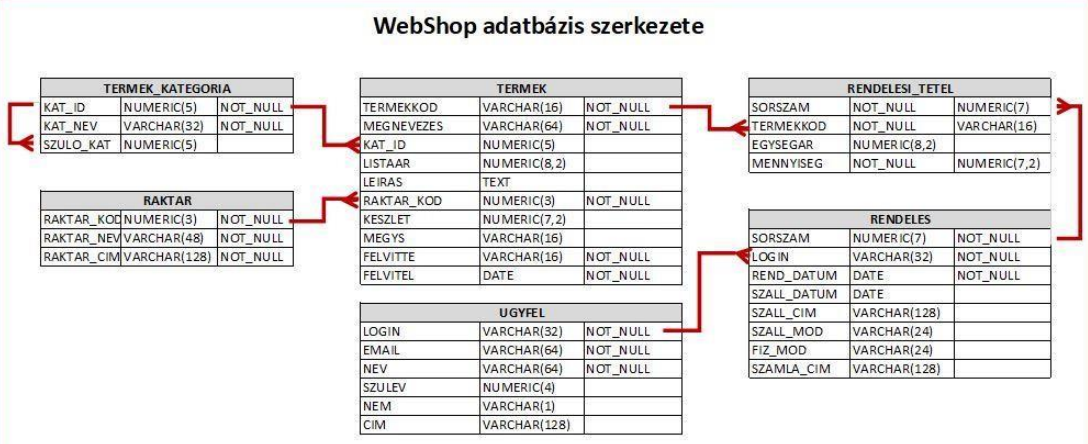

14. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát a termékek kódjáról, nevéről, kategória azonosítójáról, raktár azonosítójáról és listaáráról, valamint a termék adott szempontok szerinti rangsorokban elfoglalt helyezéseiről. (Szempontonként külön oszlopban, a helyezéseknél növekvő sorrendet feltételezve). A szempontok a következők legyenek: listaár, kategória szerinti listaár, és raktárkód szerinti listaár.</span>

1. Az oszlopokat nevezzük el értelemszerűen.
2. A helyezések egyenlőség esetén "sűrűn" kövessék egymást.
3. A lista legyen rendezett kategória azonosító, azon belül listaár szerint!

15. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát a rendelési tételekről, amely minden sor esetén göngyölítve tartalmazza az ügyfél adott rendelési tételig meglévő rendelési tételeinek összértékét!</span>

1. Az új oszlop neve legyen Eddigi rendelési tételek összértéke!
2. Az ügyfél neve is jelenjen meg!